In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# set style for professional looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries loaded.")

Libraries loaded.


In [17]:
# define file path relative to this notebook
data_path = '../data/raw/train_FD001.txt'

# define column names (from nasa documentation)
cols = ['unit', 'time', 'os1', 'os2', 'os3'] + [f's{i}' for i in range(1, 22)]

# check if file exists
if os.path.exists(data_path):
    df = pd.read_csv(data_path, sep='\s+', header=None, names=cols)
    print(f"Dataset loaded successfully. Shape: {df.shape}")
    display(df.head())
else:
    print(f"ERROR: File not found at {data_path}")
    print("Make sure you downloaded the CMAPSS data and put 'train_FD001.txt' in 'DeepRUL/data/raw/'")

Dataset loaded successfully. Shape: (20631, 26)


<>:9: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
<>:9: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
C:\Users\snowf\AppData\Local\Temp\ipykernel_7216\3830279197.py:9: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
  df = pd.read_csv(data_path, sep='\s+', header=None, names=cols)


,unit,time,os1,os2,os3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [18]:
# calculate max time cycles for each unit
max_time = df.groupby('unit')['time'].max().reset_index()
max_time.columns = ['unit', 'max_time']

# merge back into main dataframe
df = df.merge(max_time, on='unit', how='left')

# calculate rul: max_life - current_time
df['rul'] = df['max_time'] - df['time']

# drop the helper column
df.drop(columns=['max_time'], inplace=True)

print("RUL calculated.")
display(df[['unit', 'time', 'rul']].head())

RUL calculated.


,unit,time,rul
0,1,1,191
1,1,2,190
2,1,3,189
3,1,4,188
4,1,5,187


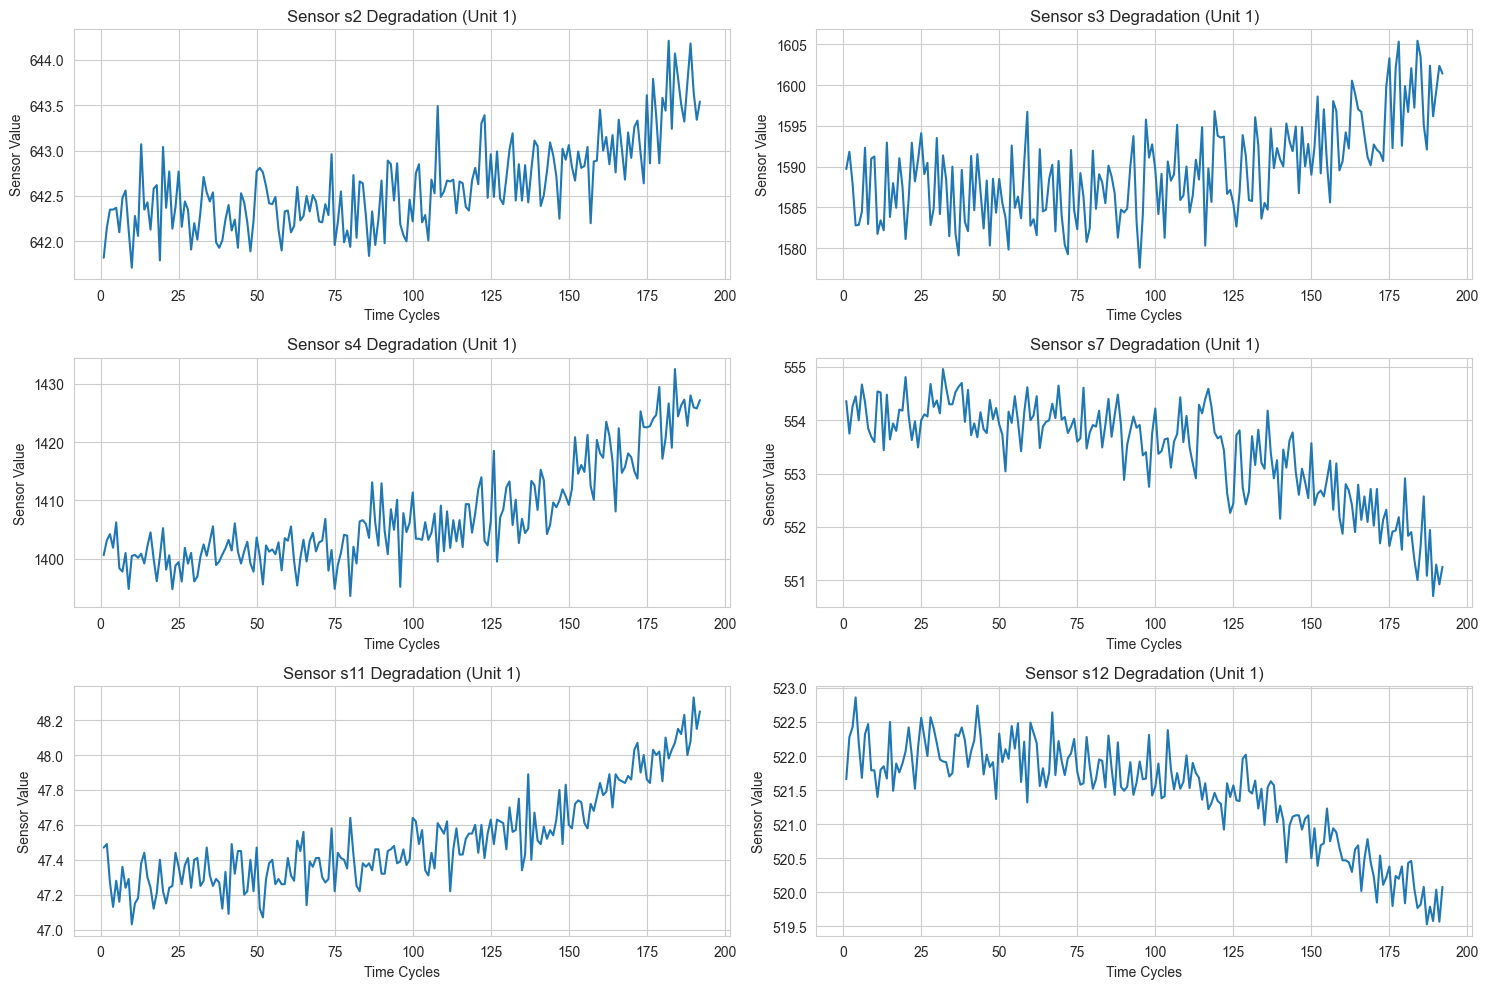

In [ ]:
# let's look at unit #1
unit_1 = df[df['unit'] == 1]

# pick some interesting sensors
sensors_to_plot = ['s2', 's3', 's4', 's7', 's11', 's12']

plt.figure(figsize=(15, 10))
for i, sensor in enumerate(sensors_to_plot):
    plt.subplot(3, 2, i+1)
    plt.plot(unit_1['time'], unit_1[sensor])
    plt.title(f'Sensor {sensor} Degradation (Unit 1)')
    plt.xlabel('Time Cycles')
    plt.ylabel('Sensor Value')

plt.tight_layout()
plt.show()

c:\Users\snowf\AppData\Local\Programs\Python\Python314\Lib\site-packages\numpy\lib\_function_base_impl.py:3023: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\snowf\AppData\Local\Programs\Python\Python314\Lib\site-packages\numpy\lib\_function_base_impl.py:3024: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


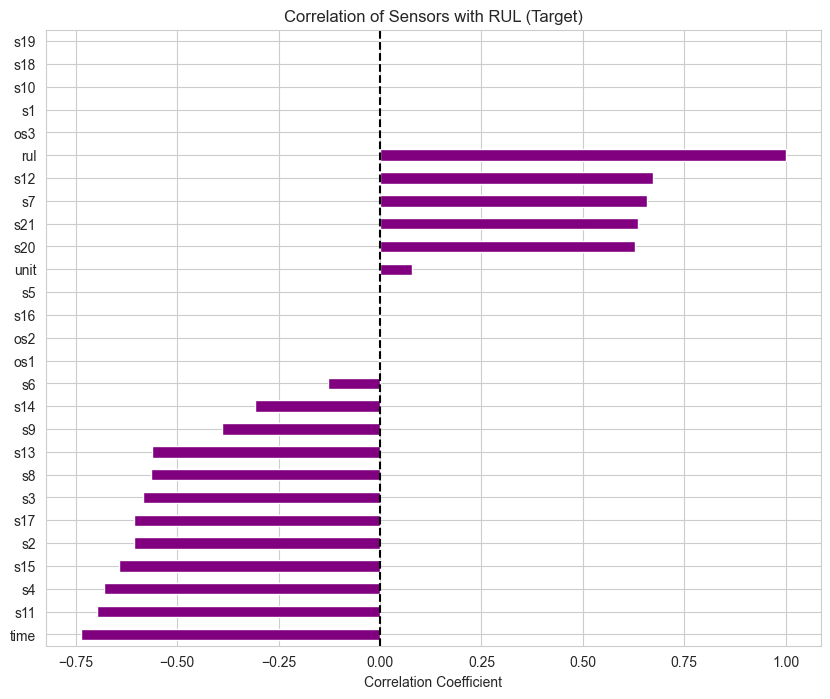

In [ ]:
# compute correlation with RUL
correlations = df.corrwith(df['rul']).sort_values()

plt.figure(figsize=(10, 8))
correlations.plot(kind='barh', color='purple')
plt.title('Correlation of Sensors with RUL (Target)')
plt.xlabel('Correlation Coefficient')
plt.axvline(x=0, color='black', linestyle='--')
plt.show()

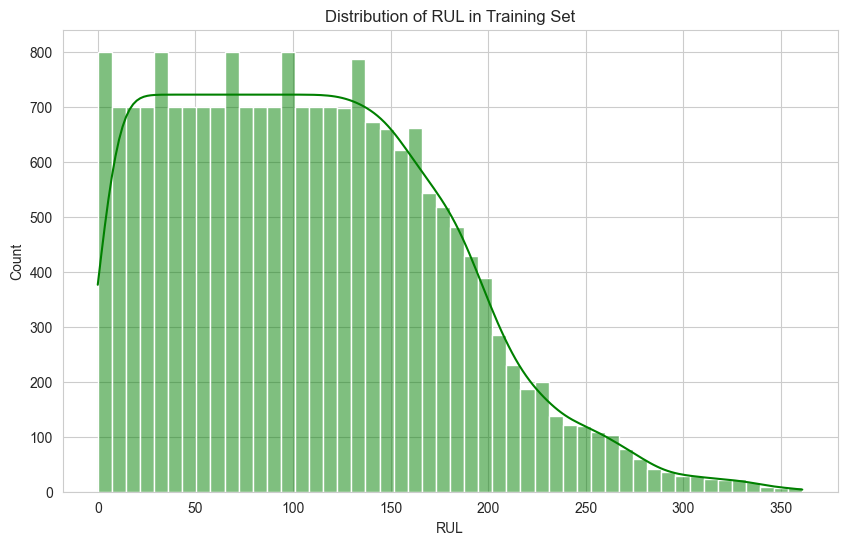

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['rul'], bins=50, kde=True, color='green')
plt.title('Distribution of RUL in Training Set')
plt.xlabel('RUL')
plt.show()